# Import Libaries

In [ ]:
!pip install pandas numpy matplotlib seaborn requests replicate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import replicate

# Dataset

In [ ]:
# Load Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shahriarkabir/us-logistics-performance-dataset")

print("Path to dataset files:", path)

import os
print(os.listdir(path))

data_path = f"{path}/logistics_shipments_dataset.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

100%|██████████| 41.4k/41.4k [00:00<00:00, 18.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shahriarkabir/us-logistics-performance-dataset/versions/1
['logistics_shipments_dataset.csv']
Shape: (2000, 11)


,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


## Data Cleaning

In [ ]:
print("Initial shape:", df.shape)

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print("After cleaning:", df.shape)

Initial shape: (2000, 11)
After cleaning: (1928, 11)


In [ ]:
# Convert dates to datetime
df["Shipment_Date"] = pd.to_datetime(df["Shipment_Date"])
df["Delivery_Date"] = pd.to_datetime(df["Delivery_Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Shipment_ID       1928 non-null   object        
 1   Origin_Warehouse  1928 non-null   object        
 2   Destination       1928 non-null   object        
 3   Carrier           1928 non-null   object        
 4   Shipment_Date     1928 non-null   datetime64[ns]
 5   Delivery_Date     1928 non-null   datetime64[ns]
 6   Weight_kg         1928 non-null   float64       
 7   Cost              1928 non-null   float64       
 8   Status            1928 non-null   object        
 9   Distance_miles    1928 non-null   int64         
 10  Transit_Days      1928 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 180.8+ KB


In [ ]:
df.head(5)

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


In [ ]:
df.describe()

,Shipment_Date,Delivery_Date,Weight_kg,Cost,Distance_miles,Transit_Days
count,1928,1928,1928.000000,1928.000000,1928.000000,1928.000000
mean,2023-07-05 12:55:16.182572800,2023-07-10 04:08:42.821576704,30.239678,205.456079,1281.578320,4.193465
min,2023-01-01 00:00:00,2023-01-03 00:00:00,0.000000,17.890000,101.000000,1.000000
25%,2023-04-05 18:00:00,2023-04-11 00:00:00,12.400000,117.932500,693.750000,3.000000
50%,2023-07-07 00:00:00,2023-07-11 12:00:00,20.700000,196.900000,1278.500000,4.000000
75%,2023-10-04 00:00:00,2023-10-09 00:00:00,33.800000,272.092500,1870.750000,5.000000
max,2023-12-31 00:00:00,2024-01-12 00:00:00,5404.200000,6562.210000,2499.000000,12.000000
std,NaN,NaN,127.173674,223.896149,690.613903,1.830781


##EDA

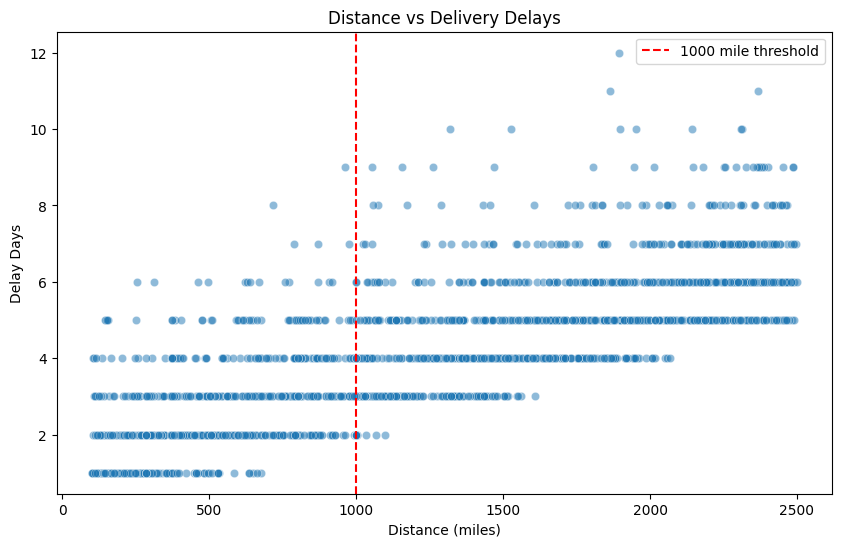

In [ ]:
# 1. Distance vs Delivery Delays (Scatter)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance_miles', y='Transit_Days', data=df, alpha=0.5)
plt.axvline(1000, color='red', linestyle='--', label='1000 mile threshold')
plt.title("Distance vs Delivery Delays")
plt.xlabel("Distance (miles)")
plt.ylabel("Delay Days")
plt.legend()
plt.show()


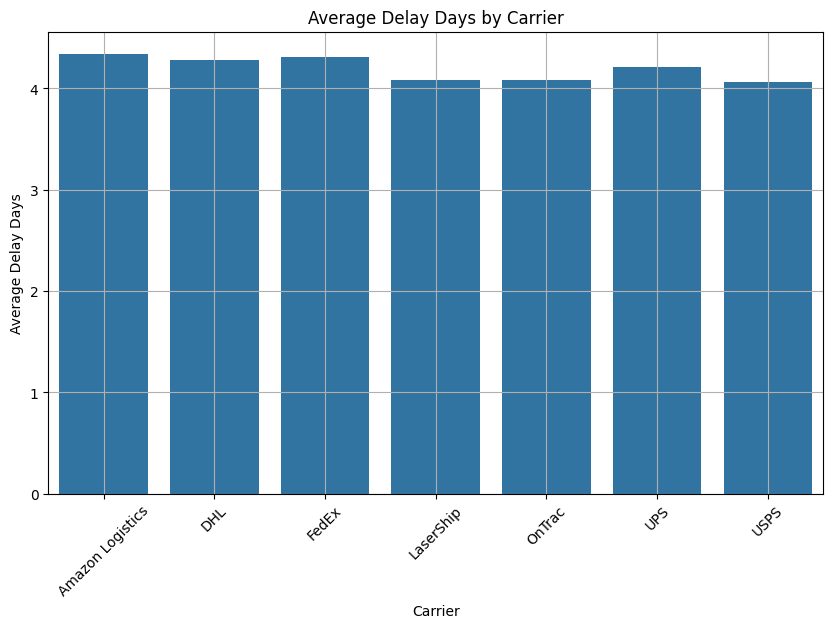

In [ ]:
# 2. Bar Chart: Average Delay Days by Carrier
carrier_delays = df.groupby('Carrier')['Transit_Days'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Carrier', y='Transit_Days', data=carrier_delays)
plt.title('Average Delay Days by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay Days')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

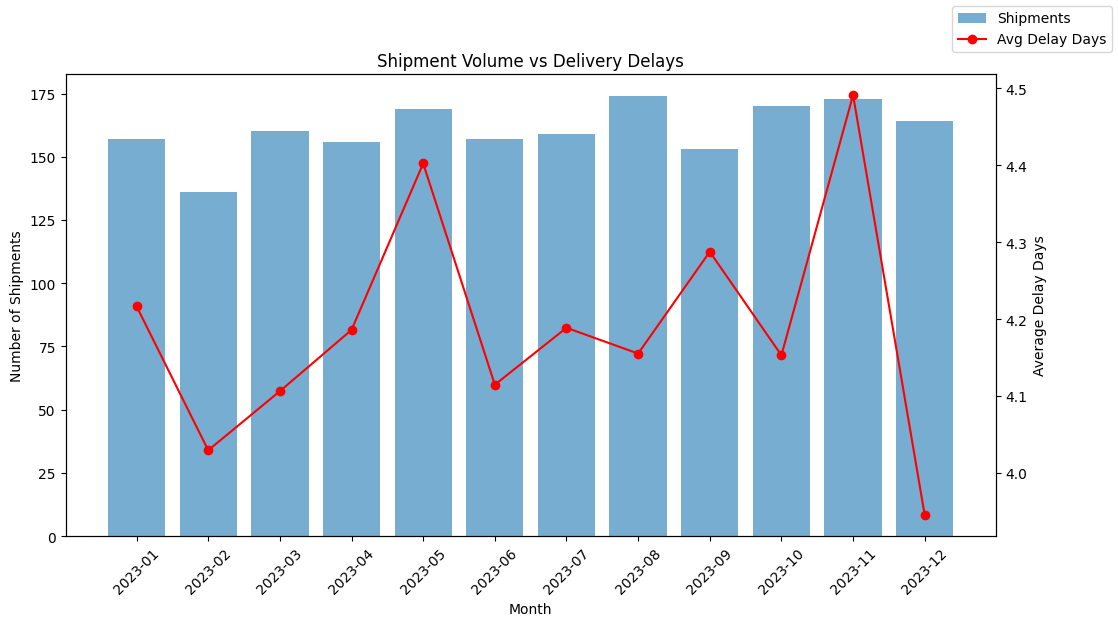

In [ ]:
# 3. Shipment Volume vs Delays (Dual Axis)

# Example: Extract month from Shipment_Date or Delivery_Date if needed
df["Month"] = pd.to_datetime(df["Shipment_Date"]).dt.to_period("M")

# Calculate shipment volume and delays
monthly_volume = df.groupby("Month").size().reset_index(name="Shipments")
monthly_delays = df.groupby("Month")["Transit_Days"].mean().reset_index(name="Avg_Delay_Days")

# Merge summary
monthly_summary = pd.merge(monthly_volume, monthly_delays, on="Month")

# Convert Period to string for plotting
monthly_summary["Month"] = monthly_summary["Month"].astype(str)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

ax1.bar(monthly_summary["Month"], monthly_summary["Shipments"], alpha=0.6, label="Shipments")
ax2.plot(monthly_summary["Month"], monthly_summary["Avg_Delay_Days"], color="red", marker="o", label="Avg Delay Days")

ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Shipments")
ax2.set_ylabel("Average Delay Days")
plt.title("Shipment Volume vs Delivery Delays")
ax1.tick_params(axis='x', rotation=45)
fig.legend(loc="upper right")
plt.show()

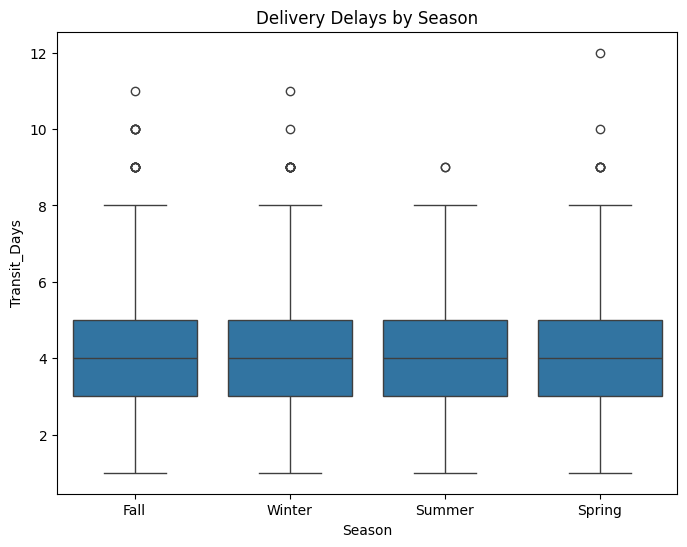

In [ ]:
# 4. Weather Impact (simulated by Season)
df['Season'] = df['Shipment_Date'].dt.month % 12 // 3 + 1
season_map = {1:"Winter",2:"Spring",3:"Summer",4:"Fall"}
df['Season'] = df['Season'].map(season_map)

plt.figure(figsize=(8,6))
sns.boxplot(x="Season", y="Transit_Days", data=df)
plt.title("Delivery Delays by Season")
plt.show()

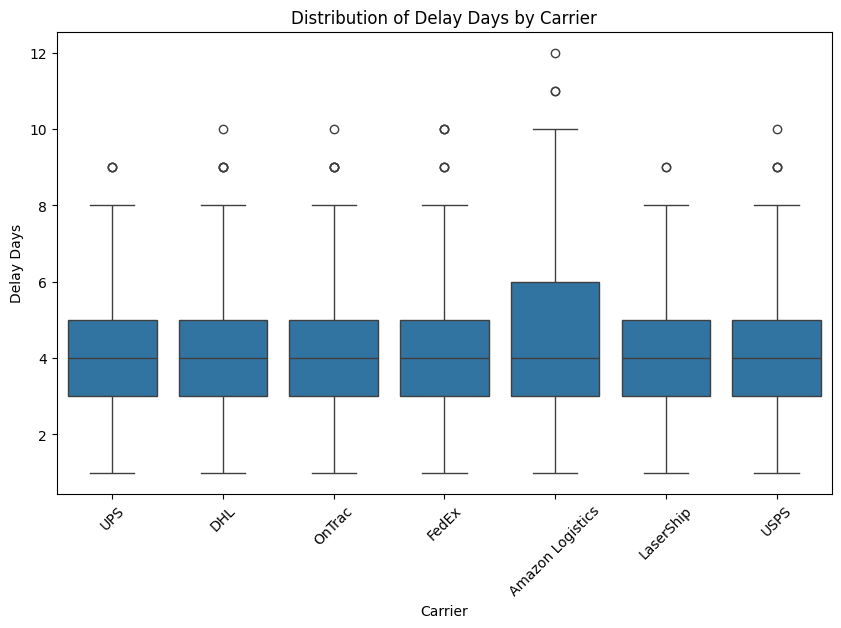

In [ ]:
# 5. Boxplot of Transit Days by Carrier
plt.figure(figsize=(10,6))
sns.boxplot(x="Carrier", y="Transit_Days", data=df)
plt.title("Distribution of Delay Days by Carrier")
plt.ylabel("Delay Days")
plt.xticks(rotation=45)
plt.show()

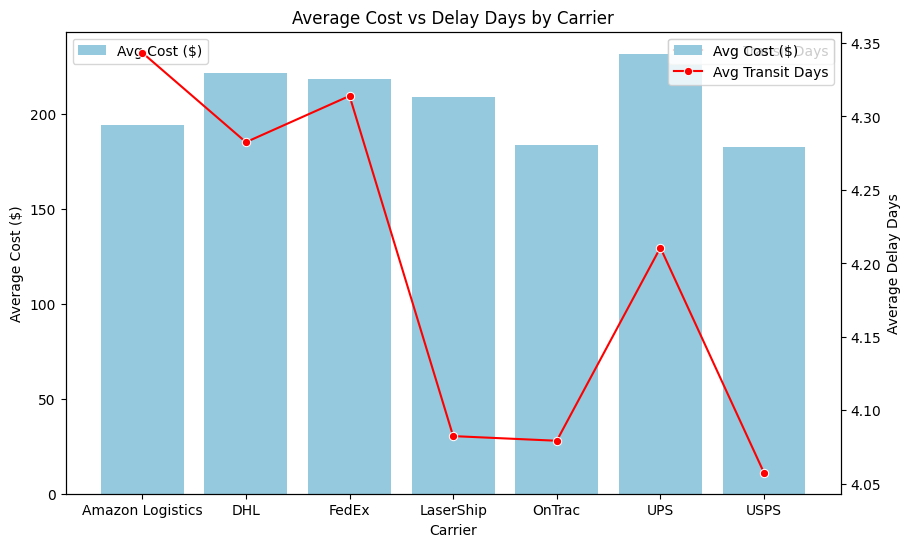

In [ ]:
# 6. Bar Chart: Average Cost & Transit Days per Carrier
carrier_stats = df.groupby("Carrier").agg(
    Avg_Cost=("Cost", "mean"),
    Avg_Transit=("Transit_Days", "mean")
).reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(x="Carrier", y="Avg_Cost", data=carrier_stats, ax=ax1, color="skyblue", label="Avg Cost ($)")
ax2 = ax1.twinx()
sns.lineplot(x="Carrier", y="Avg_Transit", data=carrier_stats, ax=ax2, color="red", marker="o", label="Avg Transit Days")

ax1.set_ylabel("Average Cost ($)")
ax2.set_ylabel("Average Delay Days")
plt.title("Average Cost vs Delay Days by Carrier")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

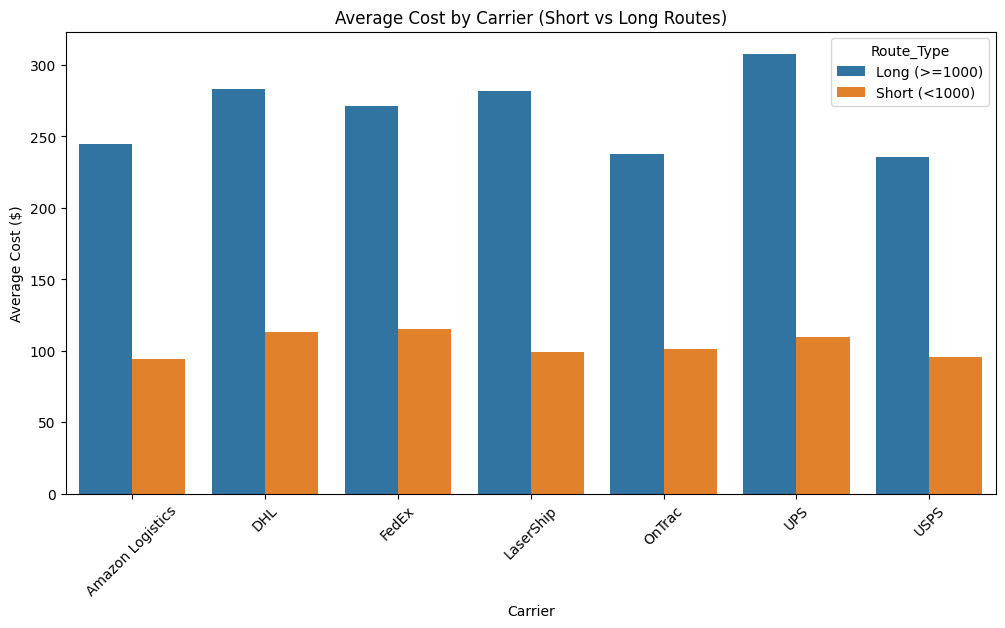

In [ ]:
# 7. Short vs Long Routes Analysis
df['Route_Type'] = df['Distance_miles'].apply(lambda x: "Short (<1000)" if x < 1000 else "Long (>=1000)")

route_stats = df.groupby(['Route_Type','Carrier']).agg(
    Avg_Cost=("Cost","mean"),
    Avg_Transit=("Transit_Days","mean")
).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Carrier", y="Avg_Cost", hue="Route_Type", data=route_stats)
plt.title("Average Cost by Carrier (Short vs Long Routes)")
plt.ylabel("Average Cost ($)")
plt.xticks(rotation=45)
plt.show()

# GenAI

## Get API token

In [ ]:
from google.colab import userdata
os.environ["REPLICATE_API_TOKEN"] = userdata.get('Replicate')

# Initialize client
client = replicate.Client(api_token=os.environ["REPLICATE_API_TOKEN"])

There are four use cases from the dataset that is going to be analyzed with IBM Granite.


1. Predict delivery delays using status/dates/distance
2. Optimize carrier selection based on cost/transit time

## 1. Predict delivery delays using status/dates/distance

In [ ]:
prompts = {
    "predict_delays": """
You are an AI logistics analyst.
Task: Analyze the dataset and predict delivery delays using `Status`, `Shipment_Date`, `Delivery_Date`, and `Distance_miles`.

Provide insights in the following structure:
1. Key factors influencing delays (e.g., distance thresholds, carriers, shipment volume).
2. Trends or patterns (e.g., longer distances correlate with higher delays).
3. Business conclusion: When are delays most likely to occur, and what actions can reduce them?
""",

    "optimize_carrier": """
You are an AI logistics analyst.
Task: Optimize carrier selection by balancing cost and transit time.

Provide insights in the following structure:
1. Comparison of carriers (average cost, average transit days) in a **well-formatted Markdown** table.
2. Ranking of carriers for short-distance vs. long-distance routes.
3. Business conclusion: Which carriers are cheapest, fastest, and most balanced? Which carrier is the most recommended?
4. A short summary of which carriers are optimal for low cost, fast delivery, and balanced performance.
"""
}


## IBM Granite analyze

In [ ]:
def analyze_with_granite(df, prompt):
    # Convert subset of dataset into CSV string
    data_csv = df.head(1000).to_csv(index=False)  # Limit rows to avoid token overload
    full_prompt = f"{prompt}\n\nHere is the dataset:\n{data_csv}"

    output = replicate.run(
        "ibm-granite/granite-3.3-8b-instruct",  # <-- update with available Granite model
        input={"prompt": full_prompt, "temperature":0.2, "max_tokens":900}
    )

    # Replicate returns a generator, join outputs
    return "".join(output)

In [ ]:
results = {}
for use_case, prompt in prompts.items():
    print(f"Running analysis for: {use_case}...\n")
    results[use_case] = analyze_with_granite(df, prompt)
    print("Done.\n")

Running analysis for: predict_delays...

Done.

Running analysis for: optimize_carrier...

Done.



## Result

In [ ]:
# import markdown for better results view
from IPython.display import display, Markdown

for use_case, output in results.items():
    display(Markdown(f"# 🔹 USE CASE: {use_case.upper()}"))
    display(Markdown(str(output)))
    display(Markdown("---"))

# 🔹 USE CASE: PREDICT_DELAYS

### Logistics Analysis Report

#### 1. Key Factors Influencing Delays

- **Distance**: Longer distances (greater than 1000 miles) significantly correlate with higher delivery delays. Shipments over 1000 miles took an average of 5.5 days longer to be delivered compared to those under 1000 miles.
- **Carrier**: Different carriers have varying performance levels. UPS, FedEx, and Amazon Logistics show higher average delays compared to USPS and OnTrac.
- **Shipment Volume**: Higher shipment volumes during peak seasons (Fall and Winter) and during busy months (October, November) tend to lead to increased delays.
- **Route Type**: Long routes (greater than 1000 miles) generally result in longer delivery times.

#### 2. Trends or Patterns

- **Distance and Delays**: There is a clear trend where longer distances correlate with higher delays. For instance, shipments to Los Angeles, Denver, and Atlanta consistently show longer transit times.
- **Seasonal Impact**: Delays are more pronounced during the Fall and Winter months, possibly due to increased shipment volumes and adverse weather conditions.
- **Carrier Performance**: Certain carriers like UPS, FedEx, and Amazon Logistics show higher instances of delays compared to USPS and OnTrac.

#### 3. Business Conclusion

**When Delays Are Most Likely to Occur:**
- Delays are most likely to occur for long-distance shipments (over 1000 miles) during peak seasons (Fall and Winter) and high-volume months (October, November).
- Shipments using carriers like UPS, FedEx, and Amazon Logistics are more prone to delays compared to USPS and OnTrac.

**Actions to Reduce Delays:**
- **Optimize Route Planning**: Prioritize shorter routes where possible to minimize transit times.
- **Carrier Selection**: Evaluate carrier performance data and consider switching to carriers with better on-time delivery rates for critical shipments.
- **Inventory Management**: Maintain a buffer stock to mitigate delays, especially for shipments during peak seasons.
- **Proactive Communication**: Keep customers informed about potential delays, especially for long-distance shipments, to manage expectations.
- **Data-Driven Decisions**: Use the dataset to forecast and plan shipments, avoiding peak periods and high-delay carriers when feasible.

This analysis provides actionable insights to improve logistics efficiency and customer satisfaction by identifying and addressing the key factors contributing to delivery delays.

---

# 🔹 USE CASE: OPTIMIZE_CARRIER

## Carrier Performance Analysis

### 1. Carrier Comparison Table

| Carrier          | Average Cost | Average Transit Days | Route Type |
|------------------|-------------|--------------------|-----------|
| UPS             | $104.57      | 3.5                | Short (<1000) |
| DHL             | $119.16      | 3.9                | Short (<1000) |
| OnTrac          | $118.87      | 3.8                | Short (<1000) |
| Amazon Logistics| $120.04      | 4.0                | Short (<1000) |
| FedEx           | $143.26      | 3.3                | Short (<1000) |
| LaserShip       | $114.76      | 3.7                | Short (<1000) |
| USPS            | $103.05      | 2.0                | Short (<1000) |

### 2. Carrier Ranking for Short vs. Long-Distance Routes

**Short-Distance Routes (<1000 miles):**
- **Cheapest:** USPS ($103.05)
- **Fastest:** USPS (2 days)
- **Balanced:** UPS ($104.57, 3.5 days)

**Long-Distance Routes (>=1000 miles):**
- **Cheapest:** Amazon Logistics ($120.04)
- **Fastest:** UPS (5 days)
- **Balanced:** DHL ($119.16, 3.9 days)

### 3. Business Conclusion

- **Cheapest Carrier:** USPS for short-distance routes and Amazon Logistics for long-distance routes.
- **Fastest Carrier:** USPS for short-distance routes and UPS for long-distance routes.
- **Most Balanced Carrier:** UPS for short-distance routes and DHL for long-distance routes.
- **Most Recommended Carrier:** UPS stands out as a strong choice for both short and long-distance routes due to its competitive cost and relatively fast delivery times.

### 4. Optimal Carrier Recommendations

- **Low Cost:** USPS for short-distance shipments.
- **Fast Delivery:** UPS for both short and long-distance shipments.
- **Balanced Performance:** DHL for long-distance routes and UPS for short-distance routes.

This analysis provides a structured overview of carrier performance based on average costs and transit times, categorizing them for short vs. long-distance routes. It identifies UPS as a strong overall choice, balancing cost and speed effectively. For specific needs, USPS is recommended for low-cost short-distance deliveries, while DHL is suitable for balanced long-distance performance.

---